In [2]:
#Netowrks
import networkx as nx
import pylab as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline


#Change the default options of visualization
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.3, color_codes=True,
rc=custom_params)


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Use the following function to plot the CDF of the degree distributions
def plot_cdf(values, scale = "log", ax = None, cum = True, compl = False, marker = 'o-', xlabel = "Degree (d)", ylabel = "p(Degree < d)"):
    from collections import Counter

    # count the number of instance per each degree, sort it
    C = Counter(values)
    deg, cnt = zip(*sorted(C.items()))
    
    # calcualte the cumulative distribution, normalize to be a probability instead of a count
    if cum:
        cs = np.cumsum(cnt)/np.sum(cnt)
    else:
        cs = cnt/np.sum(cnt)
    
    if compl:
        cs = 1 - cs
        
    if ax is None:
        ax = plt.subplot()
    # plot
    ax.plot(deg, cs, marker)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    plt.xscale(scale)
    plt.yscale(scale)

# Connectedness

In [4]:
def create_random_netw(average_degree, n = 100, plot = True):
    """
    Input:
        average_degree: average degree in network
        n: number of nodes
        plot: create plot
    Returns:
        size of largest component (%)
        
    """
    G = nx.random_graphs.fast_gnp_random_graph(n = n, p = average_degree/((n-1)))
    lg = max([len(_) for _ in nx.connected_components(G)])/n
    if plot:
        nx.draw(G,  node_size = 30, edge_color = "gray", node_color="#3d348b")
        plt.title(f"Largest component {lg:2.0%}")
    return lg


def create_many_random_net(average_degree, n = 100, plot = False, iters = 10):
    """
    Average several runs of the create_random_netw function
    """
    return np.mean([create_random_netw(average_degree, n=n, plot=plot) for _ in range(iters)])

0.655

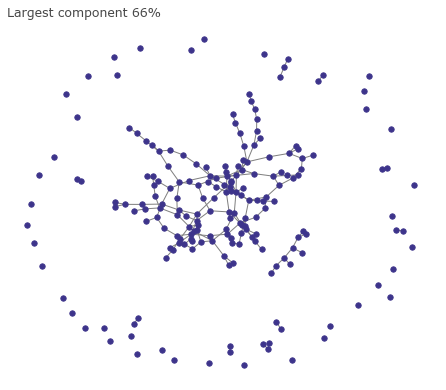

In [16]:
n = 200
average_degree = 1.5

plt.figure(figsize = (6,5))
create_random_netw(average_degree = average_degree, n = n)

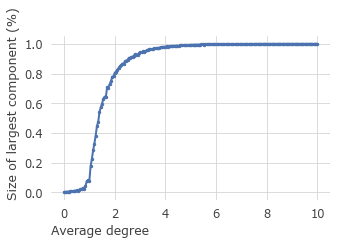

In [271]:
# Run  it many times
n = 1000

test_degrees = np.linspace(0, 10, 200)
results = [create_many_random_net(ad, n = n, iters = 10) for ad in test_degrees]
plt.plot(test_degrees, results, ".-")

plt.ylabel("Size of largest component (%)")
plt.xlabel("Average degree")
plt.grid(True)

# Small world networks

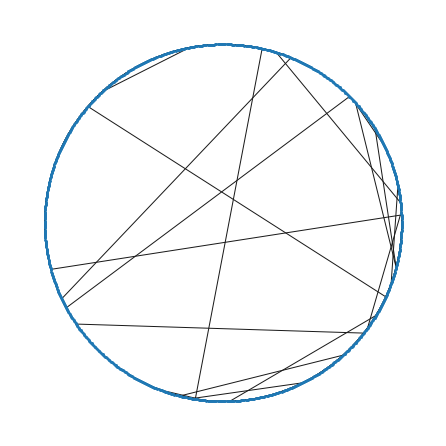

In [290]:
G = nx.random_graphs.connected_watts_strogatz_graph(1000,4,p=0.01)
pos = nx.circular_layout(G)
plt.figure(figsize=(6,6))
nx.draw(G, pos = pos, node_size = 4)

# Heavy tail distributions

In [155]:
def plot_network(G, ax):
    values = nx.degree_centrality(G).values()
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)



    nx.draw(G, pos = nx.spring_layout(G, seed = 1), node_size=500*np.array(list(values)), edge_color = "lightgray", 
          node_color = [mapper.to_rgba(i) for i in values], ax = ax)



0.10585858585858586


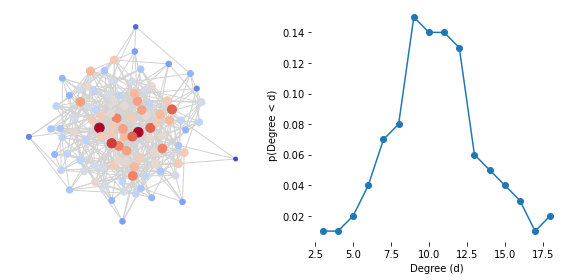

In [165]:
G = nx.random_graphs.erdos_renyi_graph(100, 10/100)
print(nx.density(G))
plt.figure(figsize=(8,4))
ax = plt.subplot(121)
plot_network(G, ax)

ax = plt.subplot(122)
plot_cdf([v for k,v in G.degree()], scale="linear", cum=False, ax = ax)

0.09595959595959595


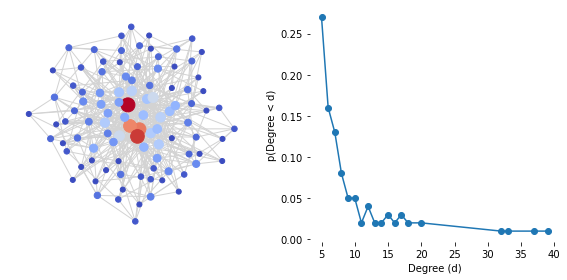

In [172]:
G = nx.random_graphs.barabasi_albert_graph(100,5)
print(nx.density(G))
plt.figure(figsize=(8,4))
ax = plt.subplot(121)
plot_network(G, ax)

ax = plt.subplot(122)
plot_cdf([v for k,v in G.degree()], scale="linear", cum=False, ax = ax)